In [ ]:
import pandas as pd

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the Data_Table_Mortages
file_path_BC= "//content/Mortages_BC.xlsx"
BC_df=pd.read_excel(file_path_BC)
BC_df.head()

In [ ]:
# Extract the year from the "Quarters" column
BC_df['Year'] = BC_df['Quarters'].str[:4].astype(int)

In [ ]:
# Group the data by year and calculate the mean of each column
BC_df = BC_df.groupby('Year').mean()

In [ ]:
# Reset the index of the dataframe
BC_df = BC_df.reset_index()

In [ ]:
BC_df.dtypes

Year                                    int64
Mortgage_delinquency_rate             float64
Average_Value_New_Loans               float64
Residential_Mortgage_Arrears_Rates    float64
dtype: object

In [ ]:
BC_df.head()

,Year,Mortgage_delinquency_rate,Average_Value_New_Loans,Residential_Mortgage_Arrears_Rates
0,2013,0.4275,296624.75,0.4575
1,2014,0.4075,314877.50,0.3975
2,2015,0.3600,340315.75,0.3175
3,2016,0.2800,379173.00,0.2400
4,2017,0.1975,374620.50,0.1675


In [ ]:
# Save the aggregated data back to the file
BC_df.to_excel("/content/BC_Data.xlsx")

In [ ]:
# Check for missing values
print(BC_df.isna().sum())

Year                                  0
Mortgage_delinquency_rate             0
Average_Value_New_Loans               0
Residential_Mortgage_Arrears_Rates    4
dtype: int64


In [ ]:
# Handle missing values
BC_cleaned_df = BC_df.fillna(BC_df.mean())

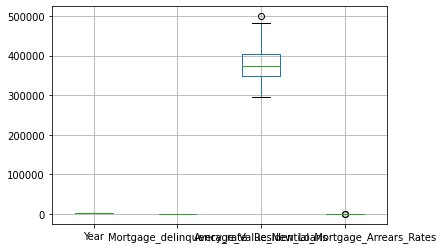

In [ ]:
# Check for outliers
BC_cleaned_df.boxplot()

In [ ]:
# Scale the data
scaler = StandardScaler()
BC_cleaned_df_scaled = scaler.fit_transform(BC_cleaned_df)

In [ ]:
# Split the data into features and target
features = BC_cleaned_df.drop(['Mortgage_delinquency_rate'], axis=1)
target = BC_cleaned_df['Mortgage_delinquency_rate']

In [ ]:
# Split the data into training and testing sets
X = BC_cleaned_df_scaled[:, 1:]
y = BC_cleaned_df_scaled[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Evaluate the model on the testing set
y_pred = model.predict(X_test)

In [ ]:
# Print the test accuracy
print("Test accuracy: ", test_accuracy)

Test accuracy:  0.6329124008393333


In [ ]:
file_path_Quebec = "/content/Mortages_Quebec.xlsx"
Quebec_df=pd.read_excel(file_path_Quebec)
Quebec_df.head()

,Quarters,Mortgage_delinquency_rate,Average_Value_New_Loans,Residential_Mortgage_Arrears_Rates
0,2013Q1,0.35,153909,0.300000
1,2013Q2,0.34,155016,0.310000
2,2013Q3,0.33,160147,0.320017
3,2013Q4,0.35,155512,0.338168
4,2014Q1,0.37,156424,0.340243


Year                                    int64
Mortgage_delinquency_rate             float64
Average_Value_New_Loans               float64
Residential_Mortgage_Arrears_Rates    float64
dtype: object

In [ ]:
Quebec_df.head()

,Year,Mortgage_delinquency_rate,Average_Value_New_Loans,Residential_Mortgage_Arrears_Rates
0,2013,0.3425,156146.00,0.317046
1,2014,0.3725,160772.00,0.344120
2,2015,0.4150,165241.25,0.360460
3,2016,0.4225,170827.75,0.356993
4,2017,0.3800,173549.00,0.307286


In [ ]:
# Save the aggregated data back to the file
Quebec_df.to_excel("/content/Quebec_Data.xlsx")

In [ ]:
# Check for missing values
print(Quebec_df.isna().sum())

Year                                  0
Mortgage_delinquency_rate             0
Average_Value_New_Loans               0
Residential_Mortgage_Arrears_Rates    4
dtype: int64


In [ ]:
# Handle missing values
Quebec_cleaned_df = Quebec_df.fillna(Quebec_df.mean())


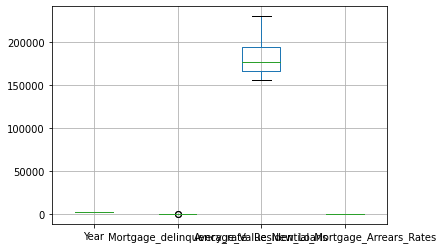

In [ ]:
# Check for outliers
Quebec_cleaned_df.boxplot()

In [ ]:
# Handle outliers
Quebec_new_df = Quebec_cleaned_df[(Quebec_cleaned_df < 3 * Quebec_cleaned_df.std()).all(axis=1)]

In [ ]:
# Scale the data
scaler = StandardScaler()
Quebec_cleaned_df_scaled = scaler.fit_transform(Quebec_cleaned_df)

In [ ]:
# Split the data into features and target
features = Quebec_df.drop(['Mortgage_delinquency_rate'], axis=1)
target = Quebec_df['Mortgage_delinquency_rate']

In [ ]:
# Split the data into training and testing sets
X = Quebec_cleaned_df_scaled[:, 1:]
y = Quebec_cleaned_df_scaled[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Evaluate the model on the testing set
y_pred = model.predict(X_test)

In [ ]:
# Print the test accuracy
print("Test accuracy: ", test_accuracy)

Test accuracy:  0.6329124008393333
